In [71]:
import pandas as pd
import numpy as np
import pyarrow
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import pickle
import os

In [2]:
# print version of packages
pd.__version__

'2.2.2'

In [12]:
df = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-01.parquet")

In [10]:
# filter the df
df = df[df.trip_type == 2]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
17,2,2022-01-01 00:12:00,2022-01-01 00:26:26,N,5.0,213,174,1.0,5.57,20.0,0.0,0.0,0.00,0.0,None,0.3,20.30,2.0,2.0,0.00
19,2,2022-01-01 00:54:40,2022-01-01 01:17:02,N,5.0,185,119,1.0,6.60,25.0,0.0,0.0,0.00,0.0,None,0.3,25.30,2.0,2.0,0.00
24,2,2022-01-01 00:02:43,2022-01-01 00:18:31,N,5.0,66,234,4.0,3.96,25.0,0.0,0.0,5.61,0.0,None,0.3,33.66,1.0,2.0,2.75
25,2,2022-01-01 00:45:23,2022-01-01 00:59:38,N,5.0,33,233,4.0,6.20,60.0,0.0,0.0,12.61,0.0,None,0.3,75.66,1.0,2.0,2.75
29,2,2022-01-01 00:02:14,2022-01-01 00:02:16,N,5.0,42,264,1.0,0.00,10.0,0.0,0.0,0.00,0.0,None,0.3,10.30,1.0,2.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56165,2,2022-01-31 23:06:05,2022-01-31 23:15:19,N,5.0,185,208,1.0,3.88,15.0,0.0,0.0,0.00,0.0,None,0.3,15.30,2.0,2.0,0.00
56166,2,2022-01-31 23:56:36,2022-02-01 00:08:29,N,5.0,185,182,1.0,3.93,12.0,0.0,0.0,0.00,0.0,None,0.3,12.30,2.0,2.0,0.00
56183,2,2022-01-31 23:44:31,2022-01-31 23:45:20,N,5.0,210,210,1.0,0.08,8.0,0.0,0.0,0.00,0.0,None,0.3,8.30,1.0,2.0,0.00
56189,2,2022-01-31 23:33:37,2022-01-31 23:33:50,N,5.0,191,191,1.0,0.00,195.0,0.0,0.0,0.00,0.0,None,0.3,195.30,2.0,2.0,0.00


In [15]:
df["duration"] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.50,...,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00,0 days 00:01:12
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.50,...,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00,0 days 00:08:43
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.50,...,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75,0 days 00:16:12
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.00,...,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00,0 days 00:08:15
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.00,...,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75,0 days 00:21:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62490,2,2022-01-31 23:25:00,2022-01-31 23:33:00,None,NaN,40,65,NaN,1.40,8.38,...,0.0,1.93,0.0,None,0.3,10.61,NaN,NaN,NaN,0 days 00:08:00
62491,2,2022-01-31 23:52:00,2022-02-01 00:10:00,None,NaN,36,61,NaN,2.97,14.92,...,0.0,0.00,0.0,None,0.3,15.22,NaN,NaN,NaN,0 days 00:18:00
62492,2,2022-01-31 23:17:00,2022-01-31 23:36:00,None,NaN,75,167,NaN,3.70,16.26,...,0.0,0.00,0.0,None,0.3,16.56,NaN,NaN,NaN,0 days 00:19:00
62493,2,2022-01-31 23:45:00,2022-01-31 23:55:00,None,NaN,116,166,NaN,1.88,9.48,...,0.0,2.17,0.0,None,0.3,11.95,NaN,NaN,NaN,0 days 00:10:00


In [16]:
td = df.duration.iloc[0]

In [18]:
td.total_seconds() / 60

1.2

In [19]:
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [20]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.50,...,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00,1.200000
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.50,...,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00,8.716667
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.50,...,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75,16.200000
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.00,...,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00,8.250000
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.00,...,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75,21.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62490,2,2022-01-31 23:25:00,2022-01-31 23:33:00,None,NaN,40,65,NaN,1.40,8.38,...,0.0,1.93,0.0,None,0.3,10.61,NaN,NaN,NaN,8.000000
62491,2,2022-01-31 23:52:00,2022-02-01 00:10:00,None,NaN,36,61,NaN,2.97,14.92,...,0.0,0.00,0.0,None,0.3,15.22,NaN,NaN,NaN,18.000000
62492,2,2022-01-31 23:17:00,2022-01-31 23:36:00,None,NaN,75,167,NaN,3.70,16.26,...,0.0,0.00,0.0,None,0.3,16.56,NaN,NaN,NaN,19.000000
62493,2,2022-01-31 23:45:00,2022-01-31 23:55:00,None,NaN,116,166,NaN,1.88,9.48,...,0.0,2.17,0.0,None,0.3,11.95,NaN,NaN,NaN,10.000000


In [24]:
df = df[df.trip_type == 2]

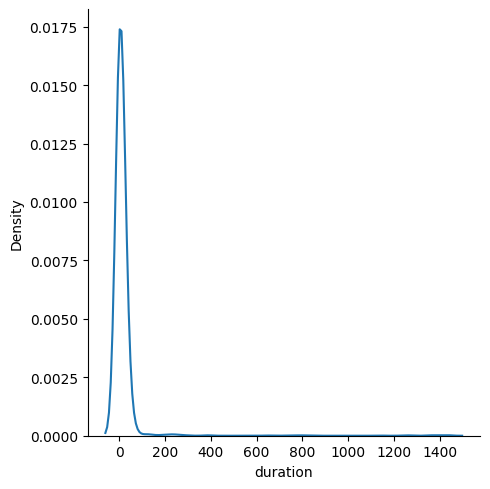

In [28]:
sns.displot(df.duration, kind='kde')

In [31]:
df.duration.describe(percentiles = [0.95, 0.98, 0.99])

count    2300.000000
mean       17.566174
std        93.381183
min         0.000000
50%         4.916667
95%        35.885833
98%        63.634333
99%       224.295000
max      1437.666667
Name: duration, dtype: float64

In [34]:
df = df[(df.duration >= 0) & (df.duration <= 60)]

In [48]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [37]:
df[categorical].dtypes

PULocationID    int64
DOLocationID    int64
dtype: object

In [40]:
# change dtype to string
df[categorical] = df[categorical].astype(str)

In [49]:
df[categorical + numerical]

,PULocationID,DOLocationID,trip_distance
17,213,174,5.57
19,185,119,6.60
24,66,234,3.96
25,33,233,6.20
29,42,264,0.00
...,...,...,...
56165,185,208,3.88
56166,185,182,3.93
56183,210,210,0.08
56189,191,191,0.00


In [54]:
train_dicts = df[categorical + numerical].to_dict(orient = 'records')

In [55]:
train_dicts

[{'PULocationID': '213', 'DOLocationID': '174', 'trip_distance': 5.57},
 {'PULocationID': '185', 'DOLocationID': '119', 'trip_distance': 6.6},
 {'PULocationID': '66', 'DOLocationID': '234', 'trip_distance': 3.96},
 {'PULocationID': '33', 'DOLocationID': '233', 'trip_distance': 6.2},
 {'PULocationID': '42', 'DOLocationID': '264', 'trip_distance': 0.0},
 {'PULocationID': '240', 'DOLocationID': '259', 'trip_distance': 0.88},
 {'PULocationID': '41', 'DOLocationID': '41', 'trip_distance': 0.58},
 {'PULocationID': '168', 'DOLocationID': '159', 'trip_distance': 1.19},
 {'PULocationID': '159', 'DOLocationID': '152', 'trip_distance': 2.96},
 {'PULocationID': '129', 'DOLocationID': '129', 'trip_distance': 0.22},
 {'PULocationID': '42', 'DOLocationID': '159', 'trip_distance': 2.72},
 {'PULocationID': '159', 'DOLocationID': '74', 'trip_distance': 1.85},
 {'PULocationID': '119', 'DOLocationID': '42', 'trip_distance': 2.13},
 {'PULocationID': '130', 'DOLocationID': '130', 'trip_distance': 0.0},
 {'P

In [56]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
X_train

<2250x365 sparse matrix of type '<class 'numpy.float64'>'
	with 6750 stored elements in Compressed Sparse Row format>

In [57]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=102',
 'DOLocationID=107',
 'DOLocationID=11',
 'DOLocationID=112',
 'DOLocationID=114',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=119',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=129',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',
 'DOLocationID=145',
 'DOLocationID=146',
 'DOLocationID=147',
 'DOLocationID=15',
 'DOLocationID=151',
 'DOLocationID=152',
 'DOLocationID=155',
 'DOLocationID=157',
 'DOLocationID=159',
 'DOLocationID=16',
 'DOLocationID=160',
 'DOLocationID=161',
 'DOLocationID=162',
 'DOLocationID=163',
 'DOLocationID=164',

In [58]:
target = 'duration'
y_train = df[target].values
y_train

array([14.43333333, 22.36666667, 15.8       , ...,  0.81666667,
        0.21666667, 13.08333333])

In [60]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [61]:
y_pred = lr.predict(X_train)

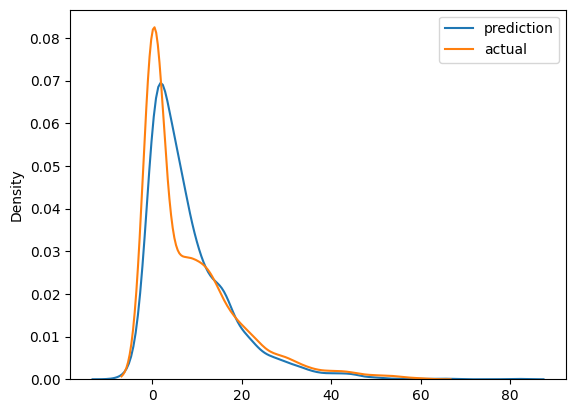

In [65]:
sns.kdeplot(y_pred, label = 'prediction')
sns.kdeplot(y_train, label = 'actual')
plt.legend()

In [69]:
root_mean_squared_error(y_train, y_pred)

np.float64(5.1420957137811305)

In [72]:
os.getcwd()

'/workspaces/mlops/01-intro'

In [75]:
with open('lin_reg.bin', 'wb') as f:
    pickle.dump((dv, lr), f)